In [1]:
from astropy.table import Table
from desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
zcat = Table.read('/global/cfs/cdirs/desi/spectro/redux/fuji/zcatalog/zpix-sv3-dark.fits')
#zcat
# for BGS /global/cfs/cdirs/desi/spectro/redux/fuji/zcatalog/zpix-sv3-bright.fits
zzcat = Table.read('/global/cfs/cdirs/desi/spectro/redux/fuji/zcatalog/zpix-sv3-bright.fits')

In [2]:
Table(zzcat)

TARGETID,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF [10],NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZCAT_NSPEC,ZCAT_PRIMARY
int64,int32,int32,float64,float64,int64,float64,float64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool
39633166985596095,10016,10016,0.2004070714061304,5.972528581816493e-05,0,7870.371614506468,590.1991672939715 .. 7.0762195559655945,7914,GALAXY,--,10,110.9653980191797,0,246.10865893366793,45.0907368173874,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.7074804116790432,516,9011,2460p450,565022,3263,DEV,0.008771323,6.429494,17.68038,32.758503,26.639423,18.12469,109.92206,62.95968,30.374863,2.3217638,0.89881164,2.5836415,7.104721,13.163747,2.5836415,7.104721,13.163747,0,4.0,0.8983309,0.0064969216,-0.25410634,0,--,0.0,0.0,0.0,0.0,N,102100,9,1152921504606846976,514,0,0,0,0,0,246.10865893366793,45.0907368173874,1,236.5518,1,1,-0.005,0.005,0.014,0.014,246.1086309373015,0.0,45.0906860585505,0.0,0.7351705,22.752344,0.015646063,4.5151753,8.420559,92.47818,34.379486,0.40207455,0.19056392,1434.3461,3.017745,278.7346,0.007568932,319.7347,1985.3965,0.91601473,4.4079146,3.5835822e-06,17.634365,7.004019e-07,0.0,807.5277,5.0926537e-06,3.5528445,8.123277,1457.0984,20.667755,283.24976,8.428128,1219.7406,2019.776,4.8709335,12.721755,1,True
39633166985595463,10016,10016,0.5871044714721063,0.00010381062117026895,0,7802.041046973318,197.46948082003146 .. 11.276037502100658,7905,GALAXY,--,10,43.300490248948336,0,246.05836546875628,45.04464464528466,0.0,0.0,2015.5,1152921504606855433,1,TGT,0.8979385266418566,517,9011,2460p450,565022,2631,EXP,0.008989078,2.4472697,7.852298,21.506872,71.55066,40.53847,175.18784,82.258896,37.771,2.8787513,1.1968758,0.83116865,2.666884,7.3044014,0.87404895,2.7030897,7.3044014,0,1.0,0.9953486,0.18433991,-0.044318326,0,--,0.0,0.0,0.0,0.0,N,102000,9,1152921504606855433,257,0,0,0,0,0,246.05836546875628,45.04464464528466,1,236.5518,1,1,-0.007,0.007,0.013,0.013,246.05832613972763,0.0,45.044597141990906,0.0,0.7323615,22.511137,0.015505279,4.461771

In [3]:
bgs_mask.names()


['BGS_FAINT',
 'BGS_BRIGHT',
 'BGS_WISE',
 'BGS_FAINT_HIP',
 'BGS_FAINT_NORTH',
 'BGS_BRIGHT_NORTH',
 'BGS_WISE_NORTH',
 'BGS_FAINT_SOUTH',
 'BGS_BRIGHT_SOUTH',
 'BGS_WISE_SOUTH']

In [4]:
desi_mask.names()

['LRG',
 'ELG',
 'QSO',
 'LRG_LOWDENS',
 'QSO_HIZ',
 'ELG_LOP',
 'ELG_HIP',
 'LRG_NORTH',
 'ELG_NORTH',
 'QSO_NORTH',
 'ELG_LOP_NORTH',
 'ELG_HIP_NORTH',
 'LRG_LOWDENS_NORTH',
 'LRG_SOUTH',
 'ELG_SOUTH',
 'QSO_SOUTH',
 'ELG_LOP_SOUTH',
 'ELG_HIP_SOUTH',
 'LRG_LOWDENS_SOUTH',
 'SKY',
 'STD_FAINT',
 'STD_WD',
 'STD_BRIGHT',
 'BAD_SKY',
 'SUPP_SKY',
 'NO_TARGET',
 'BRIGHT_OBJECT',
 'IN_BRIGHT_OBJECT',
 'NEAR_BRIGHT_OBJECT',
 'BGS_ANY',
 'MWS_ANY',
 'SCND_ANY']

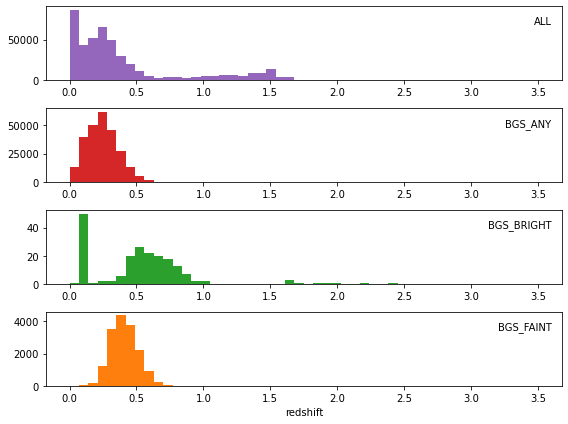

In [16]:
plt.figure(figsize=(8,6))

plt.subplot(411)
n = plt.hist(zzcat['Z'], bins=50,range=(0,3.5),color='C4')[0]
plt.text(3.6, int(0.8*np.max(n)),'ALL', ha='right')

plt.subplot(412)
ibgs = np.where(zzcat['SV3_DESI_TARGET'] & desi_mask.BGS_ANY != 0)[0]
len(ibgs)
n = plt.hist(zzcat['Z'][ibgs], bins=50,range=(0,3.5),color='C3')[0]
plt.text(3.6, int(0.8*np.max(n)),'BGS_ANY', ha='right')

plt.subplot(413)
ibb = np.where(zzcat['SV3_DESI_TARGET'] & bgs_mask.BGS_BRIGHT != 0)[0]
len(ibb)
n = plt.hist(zzcat['Z'][ibb], bins=50,range=(0,3.5),color='C2')[0]
plt.text(3.6, int(0.8*np.max(n)),'BGS_BRIGHT', ha='right')

plt.subplot(414)
ibf = np.where(zzcat['SV3_DESI_TARGET'] & bgs_mask.BGS_FAINT != 0)[0]
len(ibf)
n = plt.hist(zzcat['Z'][ibf], bins=50,range=(0,3.5),color='C1')[0]
plt.text(3.6, int(0.8*np.max(n)),'BGS_FAINT', ha='right')

plt.xlabel('redshift')
plt.tight_layout()


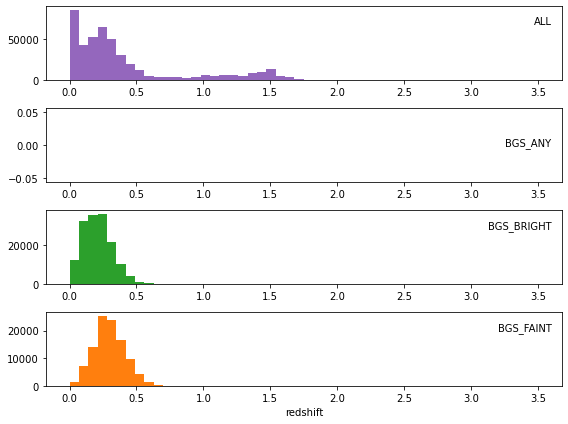

In [15]:
plt.figure(figsize=(8,6))

plt.subplot(411)
n = plt.hist(zzcat['Z'], bins=50,range=(0,3.5),color='C4')[0]
plt.text(3.6, int(0.8*np.max(n)),'ALL', ha='right')

plt.subplot(412)
ibgs2 = np.where(zzcat['SV3_BGS_TARGET'] & desi_mask.BGS_ANY != 0)[0]
len(ibgs)
n = plt.hist(zzcat['Z'][ibgs2], bins=50,range=(0,3.5),color='C3')[0]
plt.text(3.6, int(0.8*np.max(n)),'BGS_ANY', ha='right')

plt.subplot(413)
ibb2 = np.where(zzcat['SV3_BGS_TARGET'] & bgs_mask.BGS_BRIGHT != 0)[0]
len(ibb)
n = plt.hist(zzcat['Z'][ibb2], bins=50,range=(0,3.5),color='C2')[0]
plt.text(3.6, int(0.8*np.max(n)),'BGS_BRIGHT', ha='right')

plt.subplot(414)
ibf2 = np.where(zzcat['SV3_BGS_TARGET'] & bgs_mask.BGS_FAINT != 0)[0]
len(ibf)
n = plt.hist(zzcat['Z'][ibf2], bins=50,range=(0,3.5),color='C1')[0]
plt.text(3.6, int(0.8*np.max(n)),'BGS_FAINT', ha='right')

plt.xlabel('redshift')
plt.tight_layout()



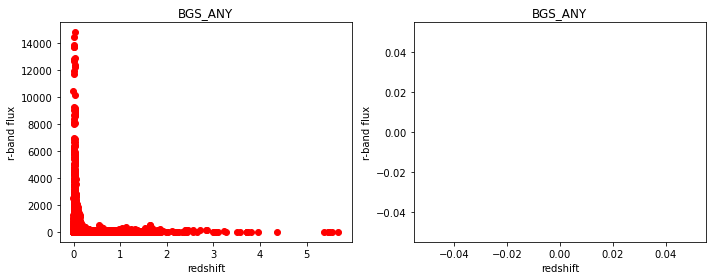

In [31]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(zzcat['Z'][ibgs],zzcat['FLUX_R'][ibgs],'ro')
plt.title('BGS_ANY')
plt.xlabel('redshift')
plt.ylabel('r-band flux')

plt.subplot(122)
plt.plot(zzcat['Z'][ibgs2],zzcat['FLUX_R'][ibgs2],'ro')
plt.title('BGS_ANY')
plt.xlabel('redshift')
plt.ylabel('r-band flux')

plt.tight_layout()
plt.show()

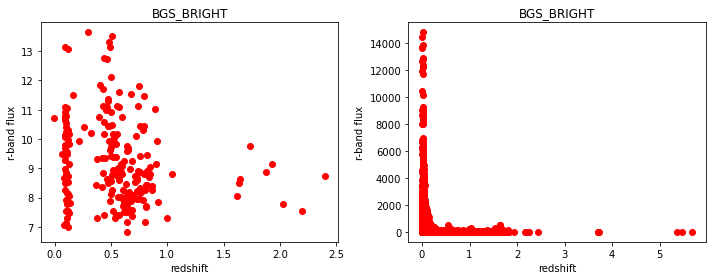

In [32]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(zzcat['Z'][ibb],zzcat['FLUX_R'][ibb],'ro')
plt.title('BGS_BRIGHT')
plt.xlabel('redshift')
plt.ylabel('r-band flux')

plt.subplot(122)
plt.plot(zzcat['Z'][ibb2],zzcat['FLUX_R'][ibb2],'ro')
plt.title('BGS_BRIGHT')
plt.xlabel('redshift')
plt.ylabel('r-band flux')

plt.tight_layout()
plt.show()

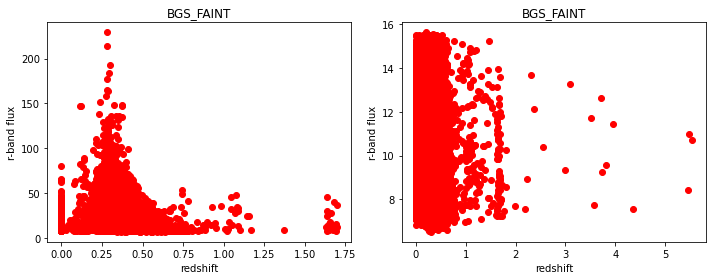

In [33]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(zzcat['Z'][ibf],zzcat['FLUX_R'][ibf],'ro')
plt.title('BGS_FAINT')
plt.xlabel('redshift')
plt.ylabel('r-band flux')

plt.subplot(122)
plt.plot(zzcat['Z'][ibf2],zzcat['FLUX_R'][ibf2],'ro')
plt.title('BGS_FAINT')
plt.xlabel('redshift')
plt.ylabel('r-band flux')

plt.tight_layout()
plt.show()

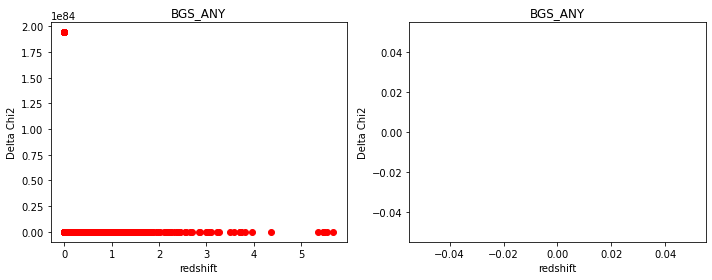

In [39]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(zzcat['Z'][ibgs],zzcat['DELTACHI2'][ibgs],'ro')
plt.title('BGS_ANY')
plt.xlabel('redshift')
plt.ylabel('Delta Chi2')

plt.subplot(122)
plt.plot(zzcat['Z'][ibgs2],zzcat['DELTACHI2'][ibgs2],'ro')
plt.title('BGS_ANY')
plt.xlabel('redshift')
plt.ylabel('Delta Chi2')

plt.tight_layout()
plt.show()

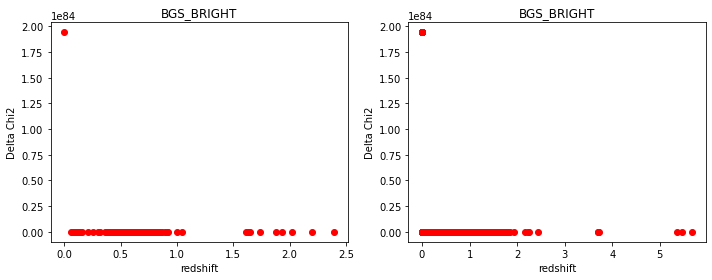

In [40]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(zzcat['Z'][ibb],zzcat['DELTACHI2'][ibb],'ro')
plt.title('BGS_BRIGHT')
plt.xlabel('redshift')
plt.ylabel('Delta Chi2')

plt.subplot(122)
plt.plot(zzcat['Z'][ibb2],zzcat['DELTACHI2'][ibb2],'ro')
plt.title('BGS_BRIGHT')
plt.xlabel('redshift')
plt.ylabel('Delta Chi2')

plt.tight_layout()
plt.show()

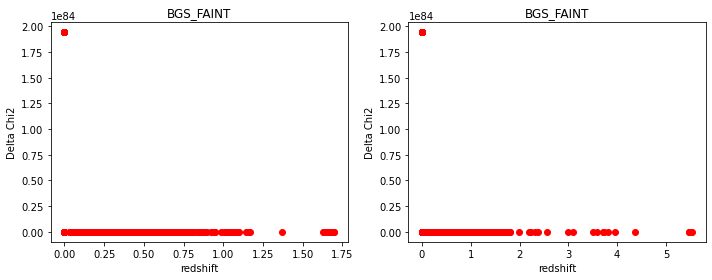

In [41]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(zzcat['Z'][ibf],zzcat['DELTACHI2'][ibf],'ro')
plt.title('BGS_FAINT')
plt.xlabel('redshift')
plt.ylabel('Delta Chi2')

plt.subplot(122)
plt.plot(zzcat['Z'][ibf2],zzcat['DELTACHI2'][ibf2],'ro')
plt.title('BGS_FAINT')
plt.xlabel('redshift')
plt.ylabel('Delta Chi2')

plt.tight_layout()
plt.show()